In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_csv("full_data.csv")
data

C:\Users\pvbha\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


# exploratory data analysis

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int64  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int32  
 5   work_type          4981 non-null   int32  
 6   Residence_type     4981 non-null   int32  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   int32  
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int32(4), int64(4)
memory usage: 350.4 KB


In [4]:
data.isnull().sum()/len(data)*100

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

In [5]:
data.shape

(4981, 11)

# outlier analyzation

<AxesSubplot:xlabel='bmi'>

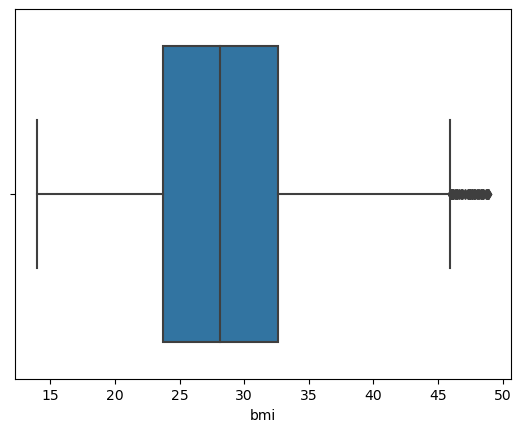

In [26]:
sns.boxplot(x=data['bmi'])

<AxesSubplot:xlabel='avg_glucose_level'>

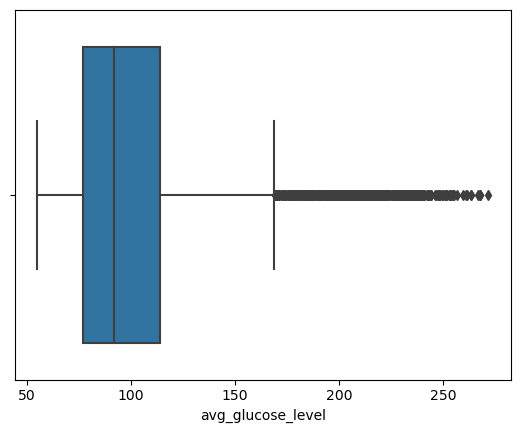

In [27]:
sns.boxplot(x=data['avg_glucose_level'])

In [36]:
data['avg_glucose_level'].describe()

count    4981.000000
mean      105.943562
std        45.075373
min        55.120000
25%        77.230000
50%        91.850000
75%       113.860000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [37]:
data['bmi'].describe()

count    4981.000000
mean       28.498173
std         6.790464
min        14.000000
25%        23.700000
50%        28.100000
75%        32.600000
max        48.900000
Name: bmi, dtype: float64

In [ ]:
#we cannot remove those outliers as they are responsible for the stroke

# encoding

In [134]:
data['work_type'].unique()

array([1, 2, 0, 3])

In [44]:
data['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [42]:
data['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [52]:
data['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [41]:
data['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [46]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()

In [51]:
gender=le.fit_transform(data['gender'])
work_type=le.fit_transform(data['work_type'])
Residence_type=le.fit_transform(data['Residence_type'])
ever_married=le.fit_transform(data['ever_married'])
smoking_status=le.fit_transform(data['smoking_status'])

In [53]:
data['gender']=gender
data['smoking_status']=smoking_status
data['Residence_type']=Residence_type
data['ever_married']=ever_married
data['work_type']=work_type

In [54]:
#preprocessed data
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,1,0
4977,1,40.0,0,0,1,1,1,191.15,31.1,3,0
4978,0,45.0,1,0,1,0,0,95.02,31.8,3,0
4979,1,40.0,0,0,1,1,0,83.94,30.0,3,0


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int64  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int32  
 5   work_type          4981 non-null   int32  
 6   Residence_type     4981 non-null   int32  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   int32  
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int32(4), int64(4)
memory usage: 350.4 KB


# partioning->train and testing of data

In [63]:
X=data.drop('stroke',axis=1)
Y=data['stroke']

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=101)

In [90]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1135,1,3.0,0,0,0,3,0,86.38,22.8,0
1001,0,28.0,0,0,1,1,1,111.22,25.5,0
1324,0,45.0,0,0,1,1,1,92.86,35.1,1
3240,0,11.0,0,0,0,3,1,107.18,27.6,0
2591,1,14.0,0,0,0,1,0,108.65,23.1,2
...,...,...,...,...,...,...,...,...,...,...
4171,0,63.0,0,0,1,2,1,60.67,28.9,1
599,1,56.0,0,0,1,1,0,81.18,26.9,2
1361,0,25.0,0,0,1,1,1,58.48,23.7,2
1547,0,27.0,0,0,0,1,0,103.35,28.1,1


In [91]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1100,0,23.00,0,0,0,1,0,79.33,41.5,2
3814,1,51.00,0,0,1,1,0,77.07,32.1,1
4624,1,4.00,0,0,0,3,1,94.23,16.2,0
2573,0,50.00,0,0,1,1,0,82.10,26.4,0
171,0,63.00,0,0,1,0,0,106.58,23.9,0
...,...,...,...,...,...,...,...,...,...,...
1663,0,0.64,0,0,0,3,1,62.27,17.3,0
4115,0,41.00,0,0,0,1,1,76.08,25.1,2
4422,1,67.00,0,0,1,1,0,83.16,25.5,1
4874,0,48.00,0,0,1,2,0,209.90,33.2,3


In [92]:
Y_train

1135    0
1001    0
1324    0
3240    0
2591    0
       ..
4171    0
599     0
1361    0
1547    0
4959    0
Name: stroke, Length: 3984, dtype: int64

In [93]:
Y_test

1100    0
3814    0
4624    0
2573    0
171     1
       ..
1663    0
4115    0
4422    0
4874    0
1492    0
Name: stroke, Length: 997, dtype: int64

# normalizing the data

In [94]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,0.416382,43.419859,0.096165,0.055210,0.658502,1.302349,0.508332,105.943562,28.498173,1.379442,0.049789
std,0.493008,22.662755,0.294848,0.228412,0.474260,0.860170,0.499981,45.075373,6.790464,1.072180,0.217531
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,14.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,77.230000,23.700000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,1.000000,1.000000,91.850000,28.100000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,2.000000,1.000000,113.860000,32.600000,2.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,3.000000,1.000000,271.740000,48.900000,3.000000,1.000000


In [96]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [99]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

In [100]:
X_train_std

array([[ 1.18688928, -1.78324856, -0.33128432, ..., -0.43567859,
        -0.83376086, -1.28504659],
       [-0.84253857, -0.67624743, -0.33128432, ...,  0.11968106,
        -0.43380194, -1.28504659],
       [-0.84253857,  0.07651334, -0.33128432, ..., -0.29080216,
         0.98827421, -0.35386696],
       ...,
       [-0.84253857, -0.80908756, -0.33128432, ..., -1.05945211,
        -0.70044122,  0.57731267],
       [-0.84253857, -0.72052747, -0.33128432, ..., -0.05627226,
        -0.04865631, -0.35386696],
       [-0.84253857, -1.16332793, -0.33128432, ..., -0.28834284,
        -0.28566901, -0.35386696]])

In [101]:
X_test_std

array([[-0.84253857, -0.89764765, -0.33128432, ..., -0.59329878,
         1.93632498,  0.57731267],
       [ 1.18688928,  0.34219361, -0.33128432, ..., -0.64382667,
         0.54387542, -0.35386696],
       [ 1.18688928, -1.73896851, -0.33128432, ..., -0.26017242,
        -1.81143821, -1.28504659],
       ...,
       [ 1.18688928,  1.05067433, -0.33128432, ..., -0.50766965,
        -0.43380194, -0.35386696],
       [-0.84253857,  0.20935347, -0.33128432, ...,  2.32591658,
         0.70682164,  1.5084923 ],
       [-0.84253857, -1.60612838, -0.33128432, ..., -0.99372114,
        -1.13002672, -1.28504659]])

# training

In [103]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [112]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [107]:
dt.feature_importances_

array([0.06018693, 0.18050913, 0.02252943, 0.03141193, 0.02008398,
       0.0391441 , 0.03071054, 0.2819017 , 0.26528748, 0.06823476])

In [108]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [115]:
Y_pred=dt.predict(X_test_std)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [110]:
from sklearn.metrics import accuracy_score

In [118]:
ac_dt=accuracy_score(Y_test,Y_pred)
ac_dt

0.8976930792377131

# logistic regression

In [122]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [123]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [130]:
Y_pred_lr=lr.predict(X_test_std)

In [132]:
Y_pred_lr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [131]:
ac_lr=accuracy_score(Y_test,Y_pred_lr)
ac_lr

0.9408224674022067

# KNN

In [135]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [136]:
knn.fit(X_train_std,Y_train)

KNeighborsClassifier()

In [140]:
Y_pred_knn=knn.predict(X_test_std)

C:\Users\pvbha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [141]:
ac_knn=accuracy_score(Y_test,Y_pred)
ac_knn

0.9408224674022067

# SVM

In [142]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train_std,Y_train)

SVC()

In [143]:
Y_pred=sv.predict(X_test_std)

In [144]:
ac_sv=accuracy_score(Y_test,Y_pred)
ac_sv

0.9408224674022067

In [145]:
ac_lr

0.9408224674022067

# Random Forest

In [146]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [147]:
rf.fit(X_train_std,Y_train)

RandomForestClassifier()

In [ ]:
Y_pred=rf.predict(X_test_std)

In [149]:
ac_rf=accuracy_score(Y_test,Y_pred)

In [150]:
ac_rf

0.9408224674022067

In [151]:
ac_knn

0.9408224674022067

In [152]:
ac_dt

0.8976930792377131

In [153]:
ac_lr

0.9408224674022067

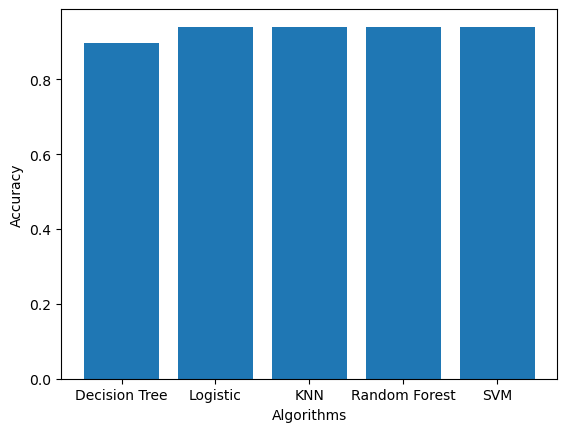

In [154]:
plt.bar(['Decision Tree','Logistic','KNN','Random Forest','SVM'],[ac_dt,ac_lr,ac_knn,ac_rf,ac_sv])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

In [2]:
import gradio as gr

def predict_brain_stroke(gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status):
    # Here is an example logic for demonstration purposes, you should replace this with your own prediction logic
    if age > 60 and hypertension == 1 and heart_disease == 1 and smoking_status == 1:
        return "There might be a stroke. Please consult a doctor."
    else:
        return "No stroke is predicted."

iface = gr.Interface(
    fn=predict_brain_stroke,
    inputs=["number", "number", "number", "number", "number", "number", "number", "number", "number", "number"],
    outputs="text",
    title="Brain Stroke Predictor",
    description="Predicts the likelihood of a brain stroke based on certain factors."
)

iface.launch(share=True)


Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://c1ecb337e8a1a3d201.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
